# 1. Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [26]:
import os
os.chdir("C:\\Users\\DILIP\\Downloads")

In [27]:
data = pd.read_csv("creditcard.csv")

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

- We have 31 columns in our dataset and 284807 entries
- Let's check if there are NaN values in the dataset

In [30]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Look's like we don't have any NaN values, so most likely we won't have to deal with data cleaning
- We can also plot the legit and fraud transactions in order to check the class distribution

In [31]:
classes = pd.value_counts(data["Class"], sort=True).sort_index()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


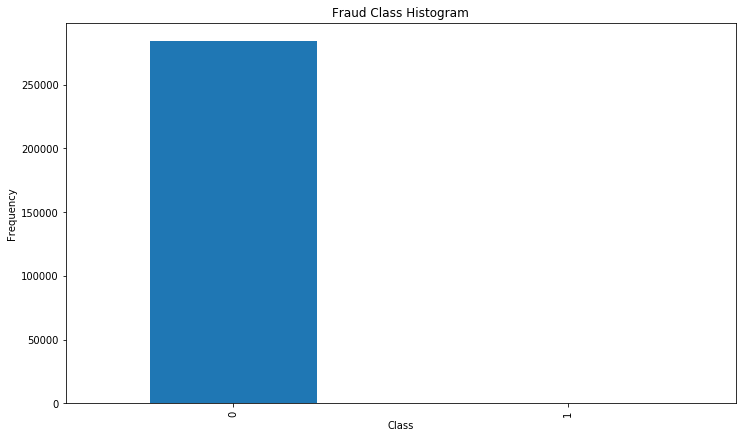

In [32]:
classes.plot(kind='bar', figsize=(12,7))
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

- As it can be seen from the plot, the data is highly imbalanced

In [33]:
normal_transactions = len(data[data["Class"] == 0])
fraud_transactions = len(data[data["Class"] == 1])
total_transactions = normal_transactions + fraud_transactions

In [34]:
print(p_normal_transactions)
print(p_fraud_transactions)

99.82725143693798
0.1727485630620034


In [35]:
p_normal_transactions = (normal_transactions / total_transactions) * 100
p_fraud_transactions = (fraud_transactions / total_transactions) * 100

- The 99% are Legit transactions and 0.17% are fraud transactions
- We going to apply undersampling to deal with this class imlabalance issue. 
- Let's also plot the fraud and legit transaction with amounts to check if there is a relationship

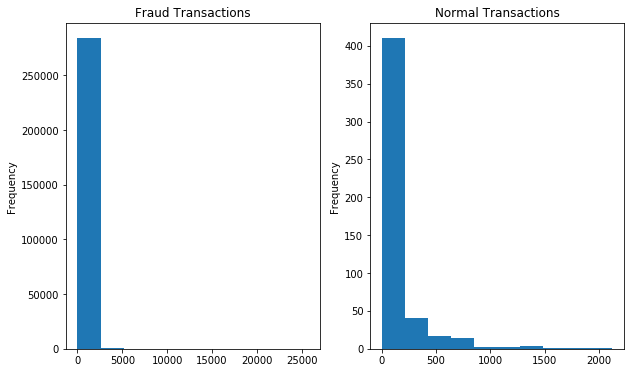

In [36]:
normal_trcs = data[data['Class'] == 0]
fraud_trcs = data[data['Class'] == 1]
plt.figure(figsize=(10,6))
plt.subplot(121)
normal_trcs.Amount.plot.hist(title="Fraud Transactions")
plt.subplot(122)
fraud_trcs.Amount.plot.hist(title="Normal Transactions")
plt.show()

- Seems like most of the transactions are less than 2500-3000K
- Also there is no pattern when we compare Amount with Class
- We can also check the pattern between Time, Amount and Class

In [37]:
def convertsecstohours(seconds):
    return datetime.datetime.fromtimestamp(seconds)

time_analyisis = data[['Time', 'Amount', 'Class']].copy()
time_analyisis['datetime'] = time_analyisis.Time.apply(convertsecstohours)
time_analyisis['hour'] = time_analyisis.datetime.dt.hour
cp_time_analysis = time_analyisis.groupby(['Class','hour'])['Amount'].count()

- Again there is no really clear pattern in the dataset
- We will train our algoirhtm without the time and amount features
- Let's start with undersampling

# 2. Undersampling

In [38]:
# Create an undersampler object
rus = RandomUnderSampler(return_indices=True)

In [39]:
# Drop the time and amount features
new_data = data.drop(data.columns[[0, 30]], axis=1)
X = new_data.values
y = data.Class.values

In [40]:
# Resample the features for training data and the target
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

In [41]:
# Revert resampeled data into a dataframe
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)
y_resampled.columns = ['Class']
undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [44]:
# Split the resampeled data into training and test sets
X = undersampled_data.values
y = undersampled_data.Class.values
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

# 3. Prediction
- We are going to train a logistic regression model
- The accuracy metric will be Recall since the normal transaction count is very high and some fraud cases can be predicted as legit. We wouldn't want that.

In [45]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\DILIP\AppData\Local\Continuum\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Test the model using the test set
predictions = lr_model.predict(X_test)

In [47]:
# Let's see the confusion matrix and evaluate the model 
cnf_matrix=confusion_matrix(y_test,predictions)

In [48]:
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))

the recall for this model is : 1.0


TP 98
TN 99
FP 0
FN 0


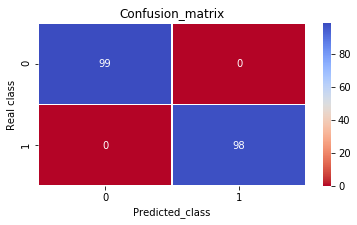


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        98

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



In [49]:
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,predictions))